In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("D:/PAULAMI/GIM/GIM Documents/Documents/Certificates/Coursera Courses/IBM Machine Learning Professional Certificate/Courses/3. Supervised Machine Learning-Classification/Week 6/Final Project/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64
0    0.651042
1    0.348958
Name: Outcome, dtype: float64


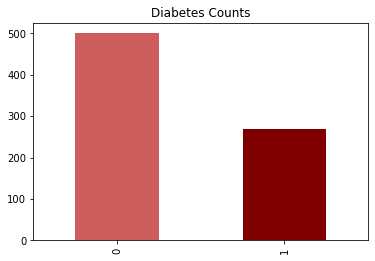

In [7]:
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True))

df['Outcome'].value_counts().plot(kind='bar', title='Diabetes Counts', color=['indianred', 'maroon'])
plt.show()

<AxesSubplot:title={'center':'Correlation with Outcome'}>

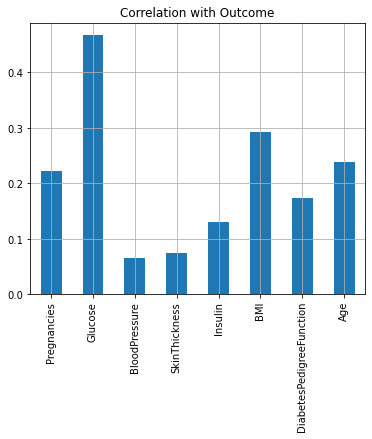

In [8]:
df.drop('Outcome', axis=1).corrwith(df.Outcome).plot(kind='bar', grid=True, figsize=(6, 5), title="Correlation with Outcome")

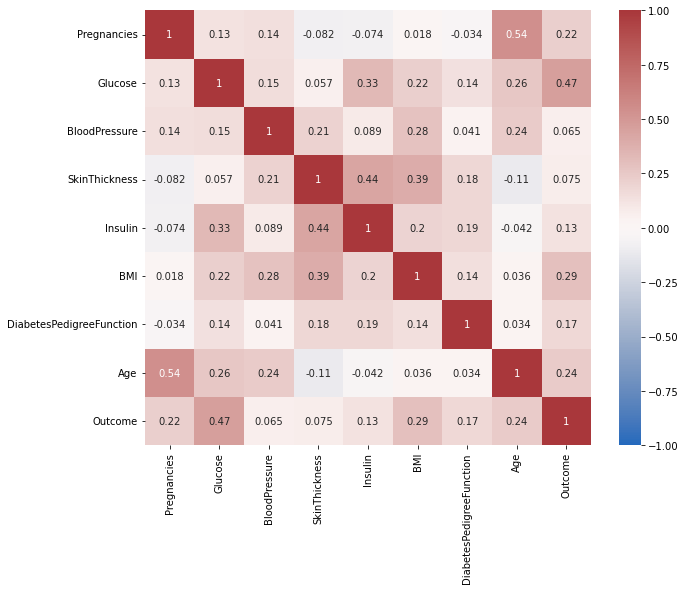

In [9]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="vlag",vmax=1,vmin=-1,center=0,annot=True)
plt.show()

In [10]:
# Categorical and Numerical Continious Features 
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('==============================')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")

Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


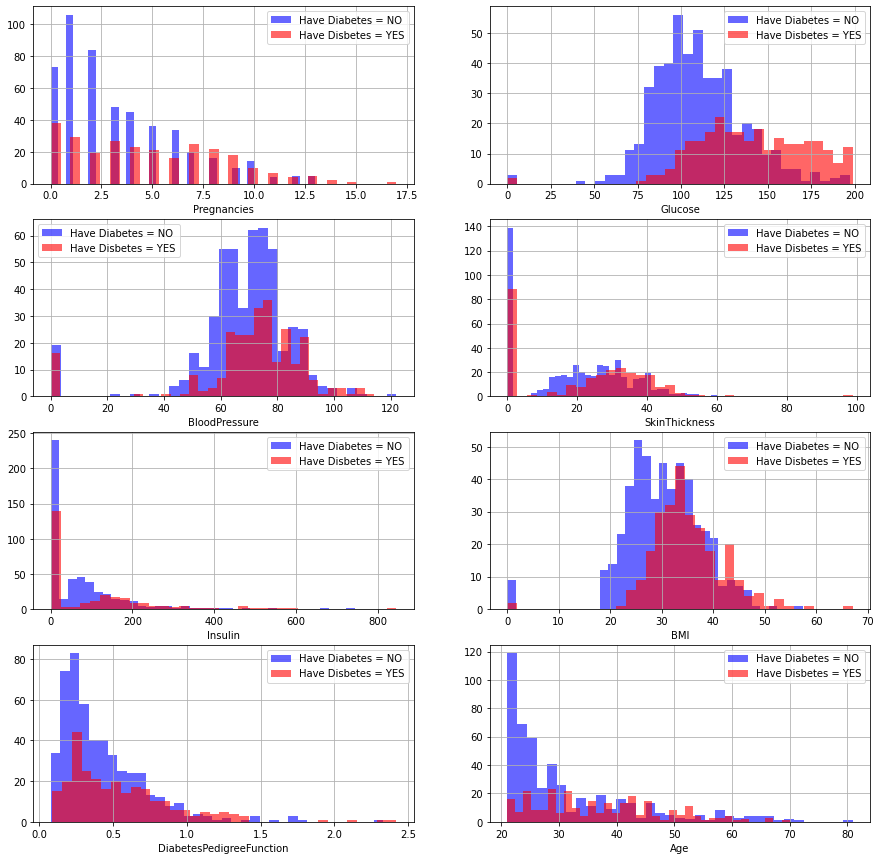

In [11]:
#Study of the relationship of continuous features and heart disease:

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(4, 2, i)
    df[df["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    df[df["Outcome"] == 1][column].hist(bins=35, color='red', label='Have Disbetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Splitting and Normalizing the data

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
feature_cols = [col_name for col_name in df.columns if col_name != 'Outcome']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)



train_idx, test_idx = next(strat_shuf_split.split(df[feature_cols], df.Outcome))

# Create the dataframes
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'Outcome']

X_test  = df.loc[test_idx, feature_cols]
y_test  = df.loc[test_idx, 'Outcome']

#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [13]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_0 = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.769231,0.677419,0.744589,0.723325,0.737037
recall,0.866667,0.518519,0.744589,0.692593,0.744589
f1-score,0.815047,0.587413,0.744589,0.701230,0.735227
support,150.000000,81.000000,0.744589,231.000000,231.000000


In [14]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred_1 = lr_l1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_1, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.769231,0.677419,0.744589,0.723325,0.737037
recall,0.866667,0.518519,0.744589,0.692593,0.744589
f1-score,0.815047,0.587413,0.744589,0.701230,0.735227
support,150.000000,81.000000,0.744589,231.000000,231.000000


In [15]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_2 = lr_l2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.769231,0.677419,0.744589,0.723325,0.737037
recall,0.866667,0.518519,0.744589,0.692593,0.744589
f1-score,0.815047,0.587413,0.744589,0.701230,0.735227
support,150.000000,81.000000,0.744589,231.000000,231.000000


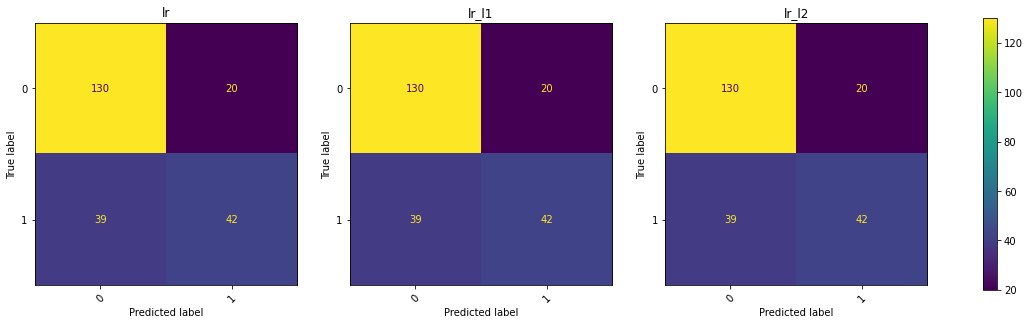

In [16]:
classifiers = {
    "lr": lr,
    "lr_l1": lr_l1,
    "lr_l2": lr_l2

}

f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()

### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

In [18]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Get minimum error id 
min_error_id = error_results['Error Rate'].idxmin()

# Get Best K 
error_results.loc[min_error_id]

K             21.0000
Error Rate     0.2294
Name: 20, dtype: float64

In [19]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

,0,1,accuracy,macro avg,weighted avg
precision,0.751412,0.685185,0.735931,0.718299,0.728190
recall,0.886667,0.456790,0.735931,0.671728,0.735931
f1-score,0.813456,0.548148,0.735931,0.680802,0.720426
support,150.000000,81.000000,0.735931,231.000000,231.000000


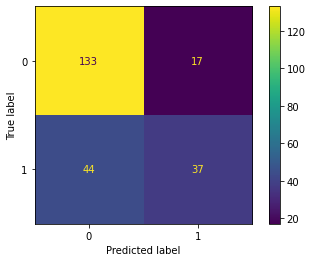

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

### XGBoost

In [21]:
%pip install xgboost


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [5],
    "learning_rate": [0.05],
    "gamma": [0, 0.25, 1, 10],
    "reg_lambda": [0],
    "scale_pos_weight": [1, 3, 5, 7, 10],
    "subsample": [0.1,0.2, 0.3, 0.4, 0.5, 0.8],
    "colsample_bytree": [0.5,0.7],
}


# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [23]:
grid_cv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 10,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.2}

In [24]:
final_xgb_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

_ = final_xgb_cl.fit(X_train, y_train)

y_pred = final_xgb_cl.predict(X_test)

xgb_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
xgb_report

,0,1,accuracy,macro avg,weighted avg
precision,0.767956,0.780000,0.770563,0.773978,0.772179
recall,0.926667,0.481481,0.770563,0.704074,0.770563
f1-score,0.839879,0.595420,0.770563,0.717650,0.754160
support,150.000000,81.000000,0.770563,231.000000,231.000000


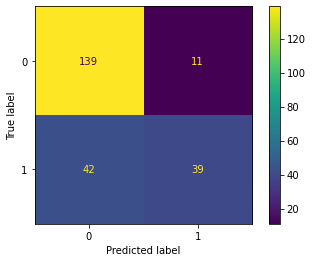

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=final_xgb_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_xgb_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()

### SVC

In [26]:
from sklearn.svm import SVC

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)

SVC_cl = svc.fit(X_train, y_train)
y_pred = SVC_cl.predict(X_test)
SVC_cl_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
SVC_cl_report

,0,1,accuracy,macro avg,weighted avg
precision,0.778443,0.687500,0.753247,0.732972,0.746554
recall,0.866667,0.543210,0.753247,0.704938,0.753247
f1-score,0.820189,0.606897,0.753247,0.713543,0.745398
support,150.000000,81.000000,0.753247,231.000000,231.000000


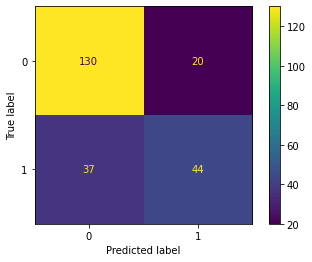

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=SVC_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()